<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_1_0_9_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.706571,85.965224,25.665839,-0.107134,213.230501,212.649160,0.581341
1,0.0,1.0,53.455916,39.322374,21.738502,0.283456,124.800249,124.256436,0.543813
2,0.0,2.0,36.899278,37.425266,39.543880,-0.361849,123.506576,123.887014,-0.380439
3,0.0,3.0,30.916764,51.589234,37.796019,0.282162,130.584180,130.333117,0.251063
4,0.0,4.0,98.227226,89.318405,98.166491,-0.768275,294.943847,295.452080,-0.508233
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.391965,21.220341,78.269309,1.192526,199.074141,197.882381,1.191760
29996,999.0,26.0,54.915495,26.635359,30.900003,-0.445229,122.005628,122.478425,-0.472797
29997,999.0,27.0,56.549013,97.453508,40.092721,1.524925,205.620167,204.364690,1.255477
29998,999.0,28.0,88.615938,89.442979,44.271313,0.255779,232.586010,232.456493,0.129517


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.706571,85.965224,25.665839,-0.107134,213.230501,212.649160,0.581341
1,0.0,1.0,53.455916,39.322374,21.738502,0.283456,124.800249,124.256436,0.543813
2,0.0,2.0,36.899278,37.425266,39.543880,-0.361849,123.506576,123.887014,-0.380439
3,0.0,3.0,30.916764,51.589234,37.796019,0.282162,130.584180,130.333117,0.251063
4,0.0,4.0,98.227226,89.318405,98.166491,-0.768275,294.943847,295.452080,-0.508233
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.391965,21.220341,78.269309,1.192526,199.074141,197.882381,1.191760
29996,999.0,26.0,54.915495,26.635359,30.900003,-0.445229,122.005628,122.478425,-0.472797
29997,999.0,27.0,56.549013,97.453508,40.092721,1.524925,205.620167,204.364690,1.255477
29998,999.0,28.0,88.615938,89.442979,44.271313,0.255779,232.586010,232.456493,0.129517


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.706571  85.965224  25.665839  ...  213.230501  212.649160  0.581341
      1.0    53.455916  39.322374  21.738502  ...  124.800249  124.256436  0.543813
      2.0    36.899278  37.425266  39.543880  ...  123.506576  123.887014 -0.380439
      3.0    30.916764  51.589234  37.796019  ...  130.584180  130.333117  0.251063
      4.0    98.227226  89.318405  98.166491  ...  294.943847  295.452080 -0.508233
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   88.391965  21.220341  78.269309  ...  199.074141  197.882381  1.191760
      26.0   54.915495  26.635359  30.900003  ...  122.005628  122.478425 -0.472797
      27.0   56.549013  97.453508  40.092721  ...  205.620167  204.364690  1.255477
      28.0   88.615938  89.442979  44.271313  ...  232.586010  232.456493  0.129517
      29.0   48.762036  33.139257  45.609427  ...  138.194121  137.622370  0.571751

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.706571  85.965224  25.665839  ...  213.230501  212.649160  0.581341
      1.0    53.455916  39.322374  21.738502  ...  124.800249  124.256436  0.543813
      2.0    36.899278  37.425266  39.543880  ...  123.506576  123.887014 -0.380439
      3.0    30.916764  51.589234  37.796019  ...  130.584180  130.333117  0.251063
      4.0    98.227226  89.318405  98.166491  ...  294.943847  295.452080 -0.508233
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   88.391965  21.220341  78.269309  ...  199.074141  197.882381  1.191760
      26.0   54.915495  26.635359  30.900003  ...  122.005628  122.478425 -0.472797
      27.0   56.549013  97.453508  40.092721  ...  205.620167  204.364690  1.255477
      28.0   88.615938  89.442979  44.271313  ...  232.586010  232.456493  0.129517
      29.0   48.762036  33.139257  45.609427  ...  138.194121  137.622370  0.571751

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.706571,85.965224,25.665839,-0.107134,213.230501,212.649160,0.581341
1,0.0,1.0,53.455916,39.322374,21.738502,0.283456,124.800249,124.256436,0.543813
2,0.0,2.0,36.899278,37.425266,39.543880,-0.361849,123.506576,123.887014,-0.380439
3,0.0,3.0,30.916764,51.589234,37.796019,0.282162,130.584180,130.333117,0.251063
4,0.0,4.0,98.227226,89.318405,98.166491,-0.768275,294.943847,295.452080,-0.508233
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,88.391965,21.220341,78.269309,1.192526,199.074141,197.882381,1.191760
29996,999.0,26.0,54.915495,26.635359,30.900003,-0.445229,122.005628,122.478425,-0.472797
29997,999.0,27.0,56.549013,97.453508,40.092721,1.524925,205.620167,204.364690,1.255477
29998,999.0,28.0,88.615938,89.442979,44.271313,0.255779,232.586010,232.456493,0.129517


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.706571  85.965224  25.665839  ...  213.230501  212.649160  0.581341
      1.0    53.455916  39.322374  21.738502  ...  124.800249  124.256436  0.543813
      2.0    36.899278  37.425266  39.543880  ...  123.506576  123.887014 -0.380439
      3.0    30.916764  51.589234  37.796019  ...  130.584180  130.333117  0.251063
      4.0    98.227226  89.318405  98.166491  ...  294.943847  295.452080 -0.508233
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   88.391965  21.220341  78.269309  ...  199.074141  197.882381  1.191760
      26.0   54.915495  26.635359  30.900003  ...  122.005628  122.478425 -0.472797
      27.0   56.549013  97.453508  40.092721  ...  205.620167  204.364690  1.255477
      28.0   88.615938  89.442979  44.271313  ...  232.586010  232.456493  0.129517
      29.0   48.762036  33.139257  45.609427  ...  138.194121  137.622370  0.571751

[30000 rows x 7 columns]

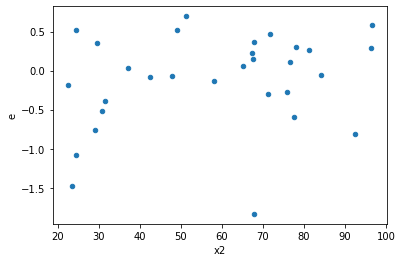

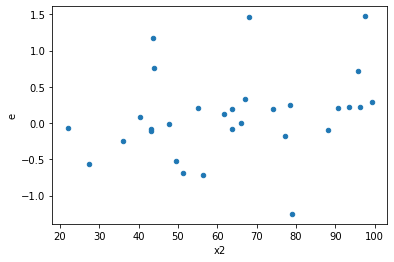

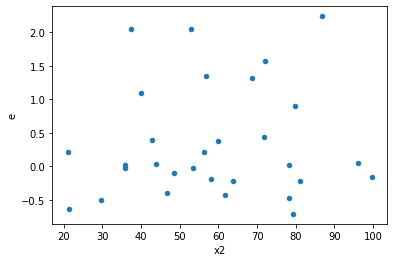

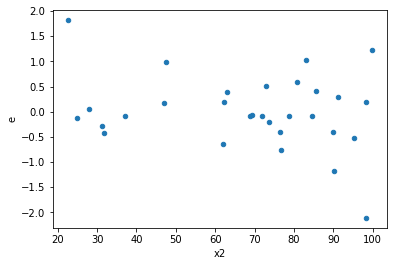

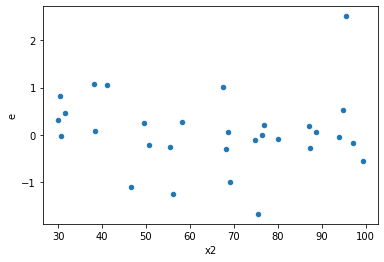

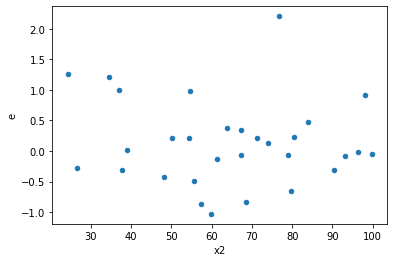

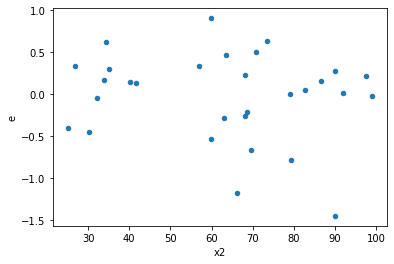

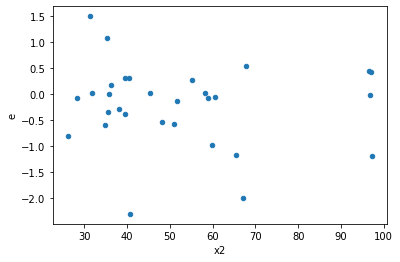

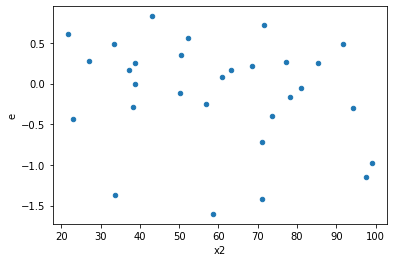

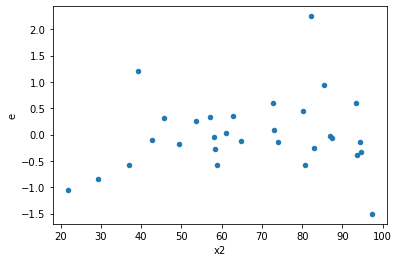

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,4.975599045370371,0.7914604801428685,0.6219498806712964,0.09893256001785856,6.286604537060667,0.011499900251368711,0.9942500498743156,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,12.645124840885535,6.820303170070445,1.5806406051106918,0.8525378962588056,1.8540414590917558,0.37135733824364436,0.8143213308781778,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,5.2984340114684425,3.8094035612081685,0.6623042514335553,0.47617544515102106,1.3908828314813728,0.6309974301596437,0.6845012849201781,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,6.330258095440939,2.439920061984441,0.7912822619301174,0.3049900077480551,2.594453070029024,0.1717446466894441,0.9141276766552779,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,5.265633320578711,2.9518136686078535,0.6582041650723389,0.3689767085759817,1.7838637230317156,0.4015705074863156,0.7992147462568422,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,8.93424009611606,4.96036907330996,1.1167800120145075,0.620046134163745,1.8011240623582092,0.39388819089404925,0.8030559045529754,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,3.855942585189433,3.5369843134587664,0.48199282314867914,0.4421230391823458,1.0901780283607654,0.8997702421962015,0.5501148789018993,Reject005=1 : Homoscedasticity
14.0,9.0,9.0,3.4760405811658535,1.3339879833743769,0.4345050726457317,0.1667484979217971,2.605751044603166,0.16986576618833427,0.9150671169058329,Reject005=1 : Homoscedasticity
15.0,9.0,9.0,5.394341714755837,4.027425593207217,0.6742927143444796,0.5034281991509021,1.339401955396545,0.6703865364419288,0.6648067317790356,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,4.975599045370371,0.7914604801428685,0.6219498806712964,0.09893256001785856,6.286604537060667,0.011499900251368711,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,12.645124840885535,6.820303170070445,1.5806406051106918,0.8525378962588056,1.8540414590917558,0.37135733824364436,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,5.551989032530907,8.166626361564003,0.6939986290663633,1.0208282951955003,0.6798387469593549,0.5745647376208213,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,5.2984340114684425,3.8094035612081685,0.6623042514335553,0.47617544515102106,1.3908828314813728,1.3690025698403563,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,6.330258095440939,2.439920061984441,0.7912822619301174,0.3049900077480551,2.594453070029024,0.1717446466894441,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,3.3271639017010433,7.184348345824077,0.4158954877126304,0.8980435432280096,0.46311283105237605,0.26696624399929547,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,1.7508338266686305,4.150377838507911,0.21885422833357882,0.5187972298134889,0.4218492616320607,0.2145895997740561,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,2.709228235109972,10.49405940060998,0.3386535293887465,1.3117574250762476,0.2581678006275145,0.056249424537719014,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,1.0775020236676776,6.652922086000647,0.1346877529584597,0.8316152607500809,0.16195921276982964,0.012247614747114409,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      839
Reject005=0 : Heteroscedasticity    161
Name: Result_test, dtype: int64